In [8]:
from scipy.misc import comb
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 计算iid的 n个分类器集体投票预测错误的概率
# 当 n为奇数时，认为多数即集体输出；当 n为偶数时， 认为 ≥ n/2 即为集体输出
# n_classifier: 分类器个数
# error: 单个分类器错误率
def ensemble_error(n_classifier, error):
    k_start = math.ceil(n_classifier / 2.0)
    # Cn m error**m *(1-error)**(n-m)
    probs = [comb(N=n_classifier, k=k) * error**k * (1-error)**(n_classifier-k) 
             for k in range(k_start, n_classifier + 1)]
    return sum(probs)

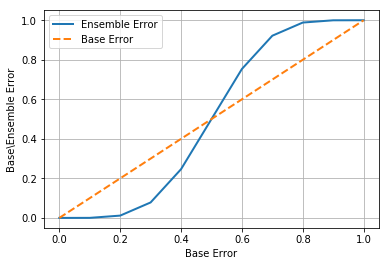

In [14]:
# 绘制随机猜测与集成猜测的错误率变化
error_range = np.arange(0, 1.01, 0.1)
ens_errors = [ensemble_error(11, error) for error in error_range]
plt.plot(error_range, ens_errors, label="Ensemble Error", lw=2)
plt.plot(error_range, error_range, label="Base Error", linestyle="--", lw=2)
plt.xlabel("Base Error")
plt.ylabel("Base\Ensemble Error")
plt.legend(loc="upper left")
plt.grid()
plt.show()